<a href="https://colab.research.google.com/github/riyashah29/MlExps/blob/main/4_logisticregressionscratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:Riya Shah    
Roll No.: D085  
SAP ID: 60009230017  
Branch: CSE DS-2-1

Aim:Implement logistic regression on a given dataset with binary and multiclass labels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

#model fitting using lib on iris

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [ ]:
df.drop('Id',axis=1,inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Species', axis=1), df['Species'], test_size=0.2, random_state=42)

In [ ]:
clf=LogisticRegression(multi_class='auto')
clf.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto')

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

1.0


In [ ]:
train_accuracy = clf.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.975


In [ ]:
test_accuracy = clf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 1.0


In [ ]:
confusion=confusion_matrix(y_test,y_pred)
print(confusion)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


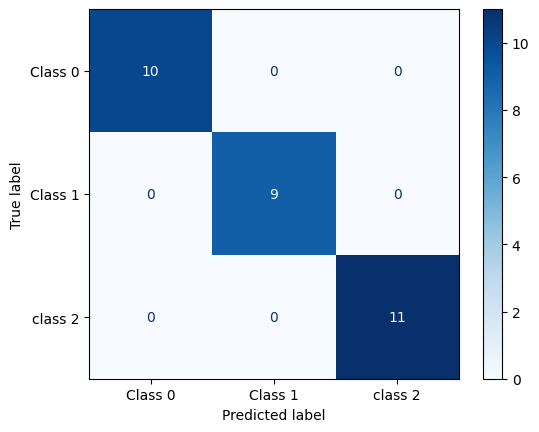

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['Class 0', 'Class 1','class 2'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

#logistic regression from scratch on synthetic dataset


In [ ]:
import numpy as np
from numpy import log,dot,e,shape

In [ ]:
from sklearn.datasets import make_classification
X,y=make_classification(n_features=4,n_classes=2)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [ ]:
def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])

In [ ]:
class LogisticRegression:
  def sigmoid(self,z):
        sig = 1/(1+e**(-z))
        return sig
  def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
  def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
  def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):

            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

In [ ]:
standardize(X_train)
standardize(X_test)
obj1 = LogisticRegression()
model= obj1.fit(X_train,y_train)
y_pred2 = obj1.predict(X_test)
y_train2 = obj1.predict(X_train)

<ipython-input-84-fb97ab55f40c>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_list[i] = cost(weights)


In [ ]:
def f1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision)

    return f1_score

f1_score_tr = f1_score(y_train,y_train2)
f1_score_te = f1_score(y_test,y_pred2)
print(f1_score_tr)
print(f1_score_te)

1.7777777777777777
1.5


#Hyperparameter tuning on iris

In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)



from sklearn.linear_model import LogisticRegression

weights, params = [], []
for c in np.arange(0, 5):
   lr = LogisticRegression(C=10**c, random_state=0)
   lr.fit(X_train_std, y_train)
   weights.append(lr.coef_[1])
   params.append(10**c)

weights = np.array(weights)

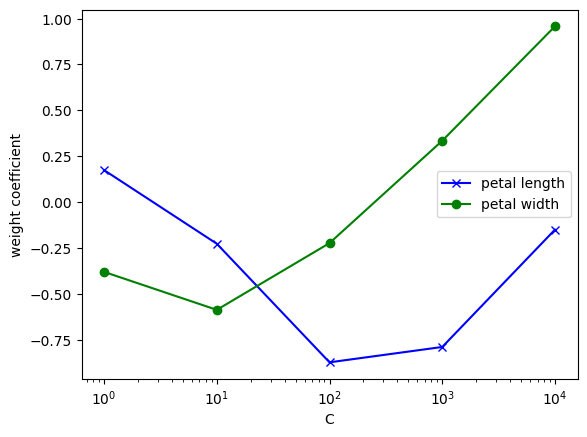

In [ ]:
import matplotlib.pyplot as plt

plt.plot(params, weights[:, 0], color='blue', marker='x', label='petal length')
plt.plot(params, weights[:, 1], color='green',  marker='o', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='right')
plt.xscale('log')
plt.show()